# Why Python and finance?

Being able to code, even just a bit, is becoming an [integral part of finance](https://www.efinancialcareers.co.uk/news/2018/11/python-for-finance). [Everything is tech now](https://www.wsj.com/articles/wall-street-erases-the-line-between-its-jocks-and-nerds-1534564810?mod=article_inline).

I think of finance career paths as having two stages. First, you get paid for what you know and how fast you can do it. Then, you get paid for convincing other people that your ideas make sense, that your firm's product is the best, that you can make money. Now is the time to work on Stage One and learn as much as we can.

Want to work at a [bank](https://www.efinancialcareers.co.uk/news/2019/11/python-replaced-excel-banking)? [Coding is a key skill](https://www.ft.com/content/4c17d6ce-c8b2-11e8-ba8f-ee390057b8c9) 

Want to trade? [There are basically no traders left who can't code](https://www.citadel.com/investment-strategies/). Algorithms are even coming for the [bond markets](https://www.ft.com/content/12888496-2c3d-4ad9-a9cd-bd418e03cb44).

> As Python takes hold, Hampson said the profile of people working on trading floors is changing. "The trading floor of the future will still have humans, but those humans will be different to the people you have today." Future traders will have hybrid skills covering finance, quantitative knowledge and the ability to automate processes and extract data, said Hampson. Today's top traders already have, "much more universal skillsets - they understand data, they understand finance, they understand how to code. That brings an agility that you didn't see until about five years ago." 

> Source: <https://www.efinancialcareers.co.uk/news/2019/11/python-replaced-excel-banking>

FinTech? Outside of customer support roles, FinTech is [10% Fin and 90% Tech](https://jobs.solana.com/jobs). 

```{figure} ../images/01-jpmorgan.png
---
name: 01-jpmorgan.png
align: center
class: with-border
---
Might as well learn now!
```

Wealth management? Roboadvisors (and traditional firms) are using [model portfolios that are rebalanced automatically](https://www.wealthfront.com/careers). Some wealth management firms have [data scientists](https://ofdollarsanddata.com/how-to-invest-your-money-when-inflation-is-high/). Even the traditional firms, like [Vanguard](https://www.vanguardjobs.com/job-search-results/?category=Data%20%26%20Analytics) are hiring for data analysts. And they have their own [digital advisor too](https://investor.vanguard.com/advice/digital-advisor/).  

We are going to learn Python because it is [ubiquitous in finance](https://bootcamp.cvn.columbia.edu/blog/best-programming-languages-finance-fintech/). It's not the fastest language, or the latest, or the one being used to [write smart contracts on the Blockchain](https://solana.com/news/getting-started-with-solana-development). But, it is the one everyone kind of assumes that you will know if you look for a more technical role. 

```{figure} ../images/01-compliance.png
---
name: 01-compliance.png
align: center
class: with-border
---
Even jobs that don't seem like tech, have some coding these days.
```

I want to prove to you that Python, and coding more generally, is extremely helpful even outside of a purely technical role. Python and Excel even [go well together](https://www.efinancialcareers.com/news/2021/11/python-excel)! And you don't have to be a computer science major to get these skills, [though that never hurt anyone](https://www.hamiltonproject.org/papers/major_decisions_what_graduates_earn_over_their_lifetimes). Life-long learning is important, even for [Goldman MDs apparently](https://www.efinancialcareers.co.uk/news/2022/01/top-machine-learning-courses). 

So, **what are we going to do**? Our textbook and these notes cover the basics of Python, enough to be dangerous. We'll learn how to get our data into Python, how to clean it, how to visualize it, how to explore it, and how to use it. We'll learn how to integrate our code with our finance knowledge, creating Markdown reports that combine code, output, and text. We'll do all of this with a goal of creating a simple trading algorithm in mind. The trading algo isn't really the end-product, though. I want you to get a foundation that will then let you explore on your own.

This [DataCamp tutorial on algorithmic trading in finance](https://www.datacamp.com/community/tutorials/finance-python-trading) will give you an idea of where we are going. 


## A first look at Python

Let's use an example from Chapter 1 of our textbook, just to see what Python can help us with. We'll bring in some data and make a graph of prices and volatility. Something that comes up all the time. Python makes this not just easy - by writing down the code, we have a **reproducible** example. Compare this to Excel, where it can be difficult, if not impossible, to tell how someone got from start to finish. Our code gives us a **recipe** for how to do something.

In [1]:
# Bring in the packages that we need. 
import numpy as np  
import pandas as pd  
from pylab import plt, mpl 

In [2]:
# Set up some graphics configuration. Just changes things from the default.
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%config InlineBackend.figure_format = 'svg'

In [3]:
# Read in some eod prices and select just the S&P 500
data = pd.read_csv('../data/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [4]:
# Calculate returns and vol, creating two new columns of data. We'll use rolling 252 day periods to capture volatility. We multiply by the standard deviation of 252 to annualize the vol.
data['rets'] = np.log(data / data.shift(1))  
data['vol'] = data['rets'].rolling(252).std() * np.sqrt(252)  

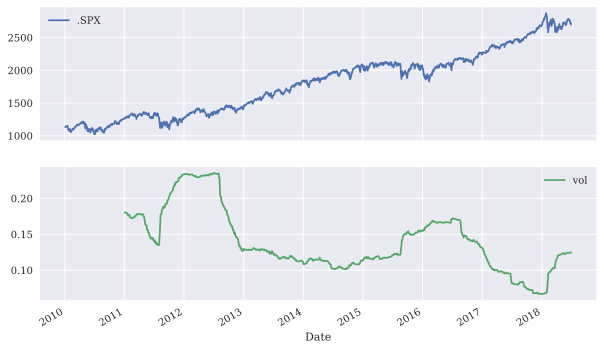

In [5]:
# Make a graph
data[['.SPX', 'vol']].plot(subplots=True, figsize=(10, 6)); 